# Converting a touchstone s2p file to xml and html
This example shows how to use pyMez to load a touchstone s2p file, convert it to xml and then to html.


## Import pyMez and pyMez.Code.DataHandlers.Translations

In [1]:
from pyMez import *
from pyMez.Code.DataHandlers.Translations import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 2.215127 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.782045 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
The module smithplot was not found,please put it on the python path
It took 2.949168 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.001001 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.35402 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.024001 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 6.909395 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.001 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.0 s to import Code.Utils.Names
I

C:\Users\sandersa\AppData\Local\Continuum\anaconda3\lib\site-packages\odo\backends\pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


## Load the s2p file into the S2PV1 class

In [2]:
s2p_file_path=os.path.join(os.getcwd(),"./S2p_to_Xml_Files/20160301_30ft_cable_0.s2p")
s2p=S2PV1(s2p_file_path)

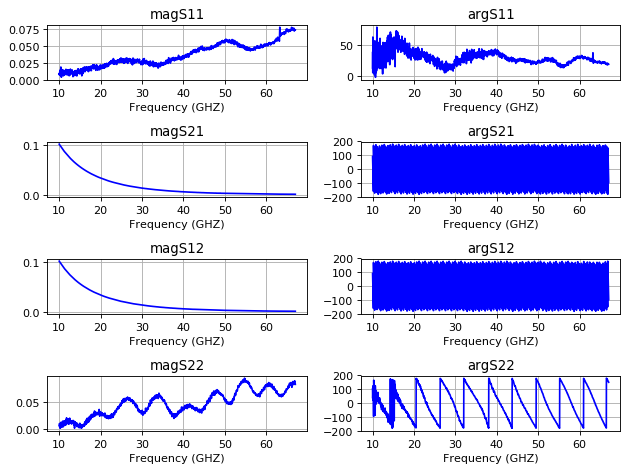

In [3]:
# if you want to see the file use the .show() method, for a pop-out plot use the %matplotlib wx magic
s2p.show();

## Convert to xml

In [4]:
# use the function found in Translations.py
xml=S2PV1_to_XmlDataTable(s2p)

## Convert to html using the appropriate style sheet

In [5]:
# to know the format of the xml file we can use .get_attribute_names()
xml.get_attribute_names()

['Frequency',
 'argS11',
 'argS12',
 'argS21',
 'argS22',
 'dbS11',
 'dbS12',
 'dbS21',
 'dbS22']

In [6]:
#now we set the proper xsl style sheet, they are currently in DataHandlers/XSL
xml.options["style_sheet"]=os.path.join(TESTS_DIRECTORY,"../XSL/S2P_DB_STYLE.xsl")

In [7]:
# now we can convert to text or save_HTML, note xml.to_HTML(xsl_path) works also
html_text=xml.to_HTML()

In [8]:
# if we want to visualize and change it as a python object we can use
html=HTMLBase(None,html_text=html_text)

In [9]:
html.show()

file://C:/Users/sandersa/AppData/Local/Temp/1/tmp8uqu06__.html


In [10]:
html.save("./S2p_to_Xml_Files/20160301_30ft_cable_0_db_format.html")

'./S2p_to_Xml_Files/20160301_30ft_cable_0_db_format.html'

In [12]:
# this can be done for all three of the common formats

xml_RI=S2PV1_to_XmlDataTable(s2p,format="RI",style_sheet=os.path.join(TESTS_DIRECTORY,"../XSL/S2P_RI_STYLE.xsl"))
html_RI=HTMLBase(html_text=xml_RI.to_HTML())
html_RI.show()
xml_MA=S2PV1_to_XmlDataTable(s2p,format="MA",style_sheet=os.path.join(TESTS_DIRECTORY,"../XSL/S2P_MA_STYLE.xsl"))
html_MA=HTMLBase(html_text=xml_MA.to_HTML())
html_MA.show()



file://C:/Users/sandersa/AppData/Local/Temp/1/tmp0ie6hlfy.html
file://C:/Users/sandersa/AppData/Local/Temp/1/tmpedqf2afk.html
